# Workshop 13 <hr/>

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Generating Synthetic Data

In [5]:
np.random.seed(42)
X = np.random.rand(100,1)
true_slope = 5
true_intercept = 2
noise= np.random.normal(0,1,size=(100,1))
y = true_intercept+ true_slope*X + noise

In [6]:
with pm.Model() as linearmodel:
    slope= pm.Normal('slope',mu=0,sd=10)
    intercept= pm.Normal('intercept',mu=0,sd=10)

    mu= intercept + slope*X

    likelihood= pm.Normal('y',mu=mu,sd=1,observed=y)
    trace=pm.sample(2000,tune=1000)

d:\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 23 seconds.
d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
The number of effective samples is smaller than 25% for some parameters.


## Analyzing the results

C:\Windows\Temp\ipykernel_13836\851248946.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
d:\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = n

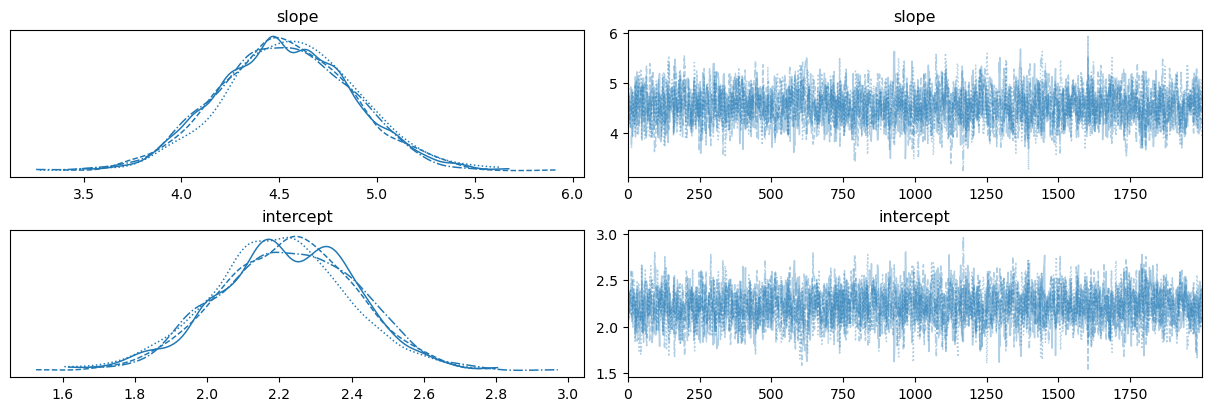

In [8]:
pm.traceplot(trace)
plt.show()

In [10]:
X_new = np.linspace(0,1,100)[: ,None]

with linearmodel:
    posterior_preds= pm.sample_posterior_predictive(trace,samples=1000)
    y_pred= posterior_preds['y'].mean(axis=0)

d:\anaconda3\envs\pm3bap\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


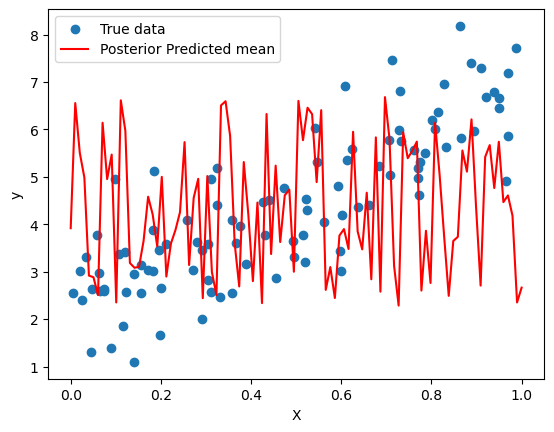

In [11]:
plt.scatter(X,y,label='True data')
plt.plot(X_new,y_pred, color='red',label='Posterior Predicted mean')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()